## Predictive Modelling

1.   Rainal Yusril B - 05211740000018
2.   Annisa Afisina - 05211740000087
3.   Zaneta Nilam C - 05211740000119




# ***Import* Modul dan *Load* Dataset** 

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #creating plots
import seaborn as sns #creating plots
sns.set()
from pandas.plotting import scatter_matrix


df = pd.read_csv('churn_prediction_dataset.csv')
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


# ***Dataset***

Data yang terdiri dari 28.382 baris dan 22 kolom merupakan data sebuah Bank yang bermaksud untuk mempertahankan para kastemernya untuk produk perbankan, yaitu saldo tabungan (saving acounts). Pihak bank menginginkan untuk mengidentifikasi apakah seorang kastemer kira-kira akan melakukan churn terhadap saldo tabungannya. Dalam hal ini, churn dapat dipandang sebagai tindakan yang tidak diharapkan sehingga saldo tabungannya tersisa di bawah saldo minimum.

## ***Data Reshaping***

In [ ]:
df.info()

In [ ]:
#data reshaping
df['customer_id'] = df['customer_id'].astype(np.object)
df.info()

## ***Data Preprocessing 1 : Missing Values***

---



In [ ]:
df.duplicated().sum()

In [ ]:
df.isna().sum()

In [ ]:
a = df["gender"].mode()
b = df["occupation"].mode()
c = df["city"].mode()
a,b,c

In [ ]:
df['gender'].fillna('Male', inplace=True)
df['occupation'].fillna('self_employed', inplace=True)
df['city'].fillna('1020', inplace=True)
df = df.dropna()

In [ ]:
df.isna().sum()

# ***Exploratory Data Analysis***

In [ ]:
df.shape

(25919, 21)

In [ ]:
df.describe()

,vintage,age,dependents,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,25919.000000,25919.000000,25919.000000,25919.000000,25919.000000,2.591900e+04,2.591900e+04,2.591900e+04,2.591900e+04,2.591900e+04,2.591900e+04,2.591900e+04,2.591900e+04,2.591900e+04,2.591900e+04,25919.000000
mean,2090.823489,48.306725,0.347236,2.216328,869.540646,7.096888e+03,7.199872e+03,7.186863e+03,6.695623e+03,3.507903e+03,3.372989e+03,3.696810e+03,3.378603e+03,7.143848e+03,7.190334e+03,0.182607
std,273.390971,17.351399,0.997661,0.662689,891.809548,2.386381e+04,2.506680e+04,2.430780e+04,1.931553e+04,8.011621e+04,3.067350e+04,5.319061e+04,2.412242e+04,2.378675e+04,2.542146e+04,0.386352
min,73.000000,1.000000,0.000000,1.000000,1.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,1958.000000,36.000000,0.000000,2.000000,159.500000,1.799005e+03,1.916945e+03,2.195425e+03,1.849705e+03,3.300000e-01,3.300000e-01,4.300000e-01,4.300000e-01,2.017865e+03,2.086880e+03,0.000000
50%,2154.000000,46.000000,0.000000,2.000000,539.000000,3.303200e+03,3.390180e+03,3.547740e+03,3.379840e+03,6.300000e-01,6.400000e-01,1.241200e+02,1.411100e+02,3.457640e+03,3.467650e+03,0.000000
75%,2292.000000,60.000000,0.000000,3.000000,1374.000000,6.627380e+03,6.648620e+03,6.661945e+03,6.518205e+03,7.148800e+02,8.057100e+02,1.414695e+03,1.422585e+03,6.658135e+03,6.648570e+03,0.000000
max,2476.000000,90.000000,52.000000,3.000000,4782.000000,1.435873e+06,1.435873e+06,1.608344e+06,1.389627e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,1.435873e+06,1.572833e+06,1.000000


In [ ]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,1020,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
4,6,1579,42,Male,2.0,self_employed,1494,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
5,7,1923,42,Female,0.0,self_employed,1096,2,1666,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01


In [ ]:
df.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
28377,30297,2325,10,Female,0.0,student,1020,2,1207,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046,2,223,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096,2,588,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219,3,274,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT
28381,30301,1175,18,Male,0.0,student,1232,2,474,2107.05,2821.34,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1,2019-11-02


## ***Univariate Analysis: Categorical***

Text(0.5, 1.0, 'Gender Ratio')

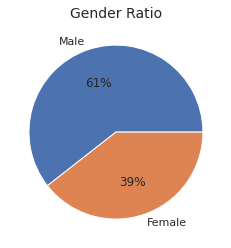

In [ ]:
#Gender
gender_ratio = df.gender.value_counts() / len(df.gender)
labels = 'Male', 'Female'

fig, ax = plt.subplots()
ax.pie(gender_ratio, labels=labels, autopct='%.f%%')
ax.set_title('Gender Ratio', fontsize=14)

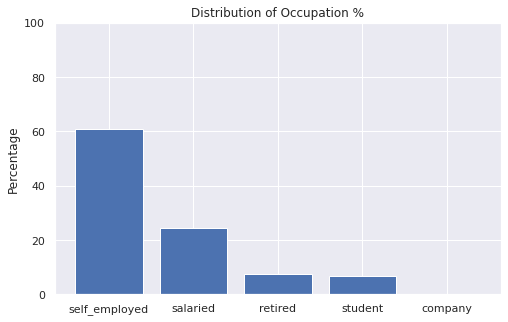

In [ ]:
#Occupation
fig, axes1 = plt.subplots(figsize=(8,5))

data = df['occupation'].value_counts(normalize=True)
axes1.bar(data.index, data*100)
axes1.set_title('Distribution of Occupation %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


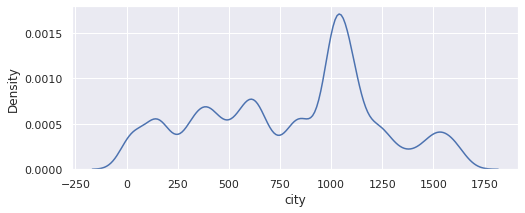

In [ ]:
df['city'] = df['city'].astype(np.int)
for col in ['city']:
    fig = plt.figure(figsize=(8,3))
    sns.kdeplot(df[col])

Text(0.5, 1.0, 'Distribution of Customer Category')

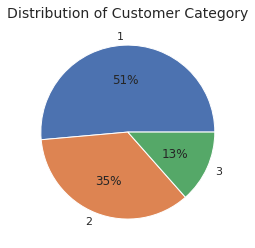

In [ ]:
#Customer Category
cust_category = df.customer_nw_category.value_counts() / len(df.customer_nw_category)
labels = '1', '2', '3'

fig, ax = plt.subplots()
ax.pie(cust_category, labels=labels, autopct='%.f%%')
ax.set_title('Distribution of Customer Category', fontsize=14)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


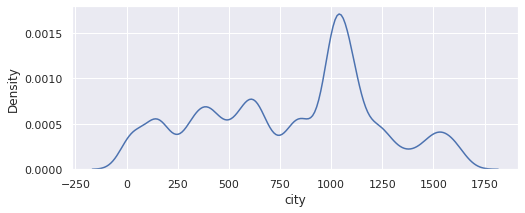

In [ ]:
df['city'] = df['city'].astype(np.int)
for col in ['city']:
    fig = plt.figure(figsize=(8,3))
    sns.kdeplot(df[col])

Text(0.5, 1.0, 'Churn vs Non Churn')

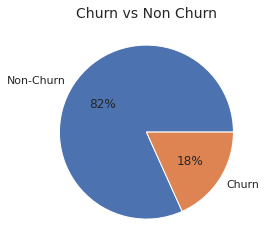

In [ ]:
#Target Variable = CHURN
churn_rate = df.churn.value_counts()
labels = 'Non-Churn', 'Churn'

fig, ax = plt.subplots()
ax.pie(churn_rate, labels=labels, autopct='%.f%%')
ax.set_title('Churn vs Non Churn', fontsize=14)

In [ ]:
df['last_transaction'].value_counts

<bound method IndexOpsMixin.value_counts of 0        2019-05-21
1        2019-11-01
2               NaT
4        2019-11-03
5        2019-11-01
            ...    
28377    2019-10-22
28378    2019-12-17
28379    2019-12-31
28380           NaT
28381    2019-11-02
Name: last_transaction, Length: 25919, dtype: object>

<function matplotlib.pyplot.show>

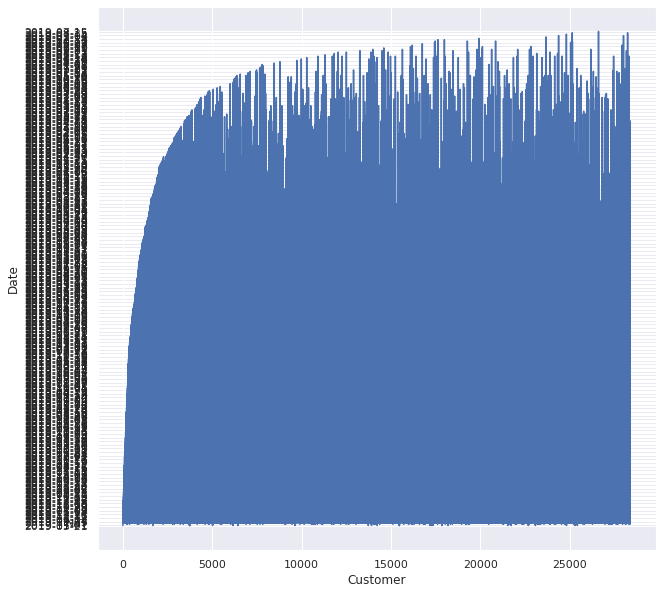

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(df['last_transaction'])
ax.set(xlabel="Customer",
       ylabel = "Date",)
plt.show

## ***Univariate Analysis: Numeric***

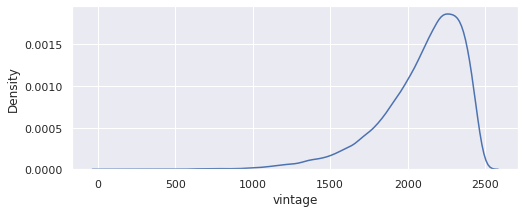

In [ ]:
#Vintage
for col in ['vintage']:
    fig = plt.figure(figsize=(8,3))
    sns.kdeplot(df[col])

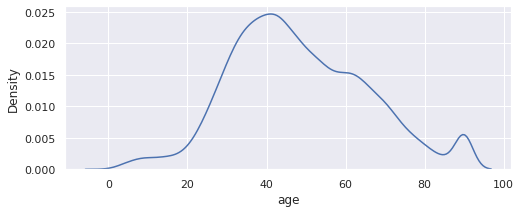

In [ ]:
#Age
for col in ['age']:
    fig = plt.figure(figsize=(8,3))
    sns.kdeplot(df[col])

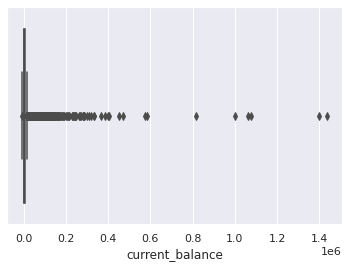

In [ ]:
sns.boxplot(x = 'current_balance', data=df)

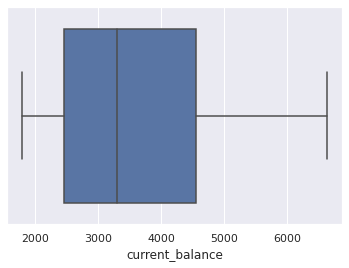

In [ ]:
def IQR (df, colname, bounds = [0.25, 0.75]):
  s = df[colname]
  q = s.quantile(bounds)
  return df[~s.clip(*q).isin(q)]

df_baru1 = df.copy()
df_baru1 = IQR(df_baru1, 'current_balance')

sns.boxplot(x = 'current_balance', data=df_baru1)

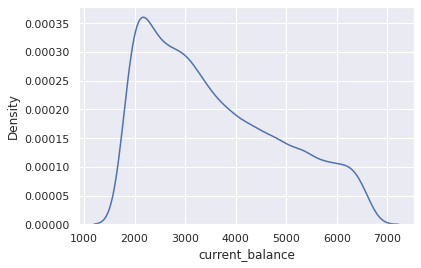

In [ ]:
sns.kdeplot(x = 'current_balance', data=df_baru1)

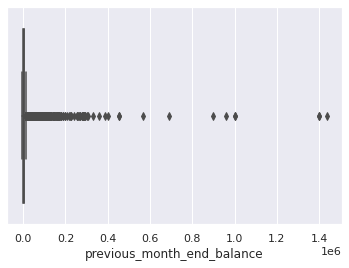

In [ ]:
sns.boxplot(x = 'previous_month_end_balance', data=df)

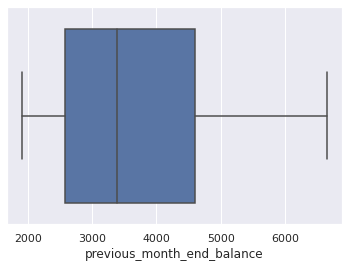

In [ ]:
df_baru2 = df.copy()
df_baru2 = IQR(df_baru2, 'previous_month_end_balance')

sns.boxplot(x = 'previous_month_end_balance', data=df_baru2)

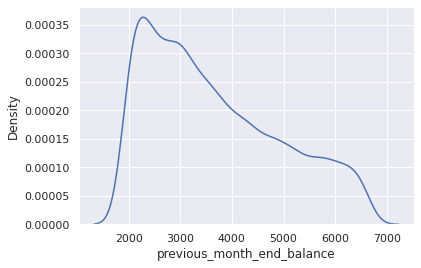

In [ ]:
sns.kdeplot(x = 'previous_month_end_balance', data=df_baru2)

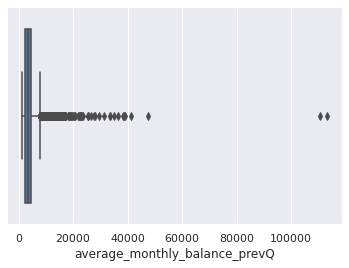

In [ ]:
sns.boxplot(x = 'average_monthly_balance_prevQ', data=df_baru2)

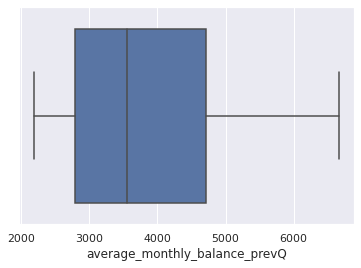

In [ ]:
df_baru3 = df.copy()
df_baru3 = IQR(df_baru3, 'average_monthly_balance_prevQ')

sns.boxplot(x = 'average_monthly_balance_prevQ', data=df_baru3)

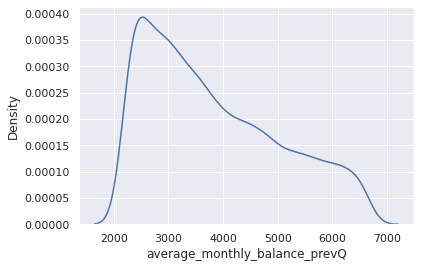

In [ ]:
sns.kdeplot(x = 'average_monthly_balance_prevQ', data=df_baru3)

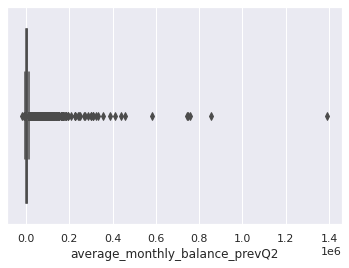

In [ ]:
sns.boxplot(x = 'average_monthly_balance_prevQ2', data=df)

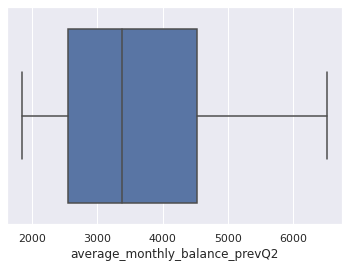

In [ ]:
df_baru4 = df.copy()
df_baru4 = IQR(df_baru4, 'average_monthly_balance_prevQ2')

sns.boxplot(x = 'average_monthly_balance_prevQ2', data=df_baru4)

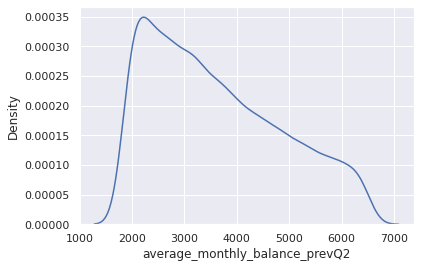

In [ ]:
sns.kdeplot(x = 'average_monthly_balance_prevQ2', data=df_baru4)

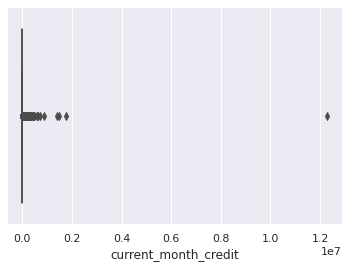

In [ ]:
sns.boxplot(x = 'current_month_credit', data=df)

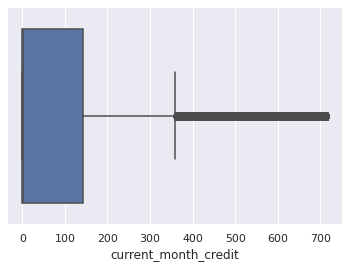

In [ ]:
df_baru5 = df.copy()
df_baru5 = IQR(df_baru5, 'current_month_credit')

sns.boxplot(x = 'current_month_credit', data=df_baru5)

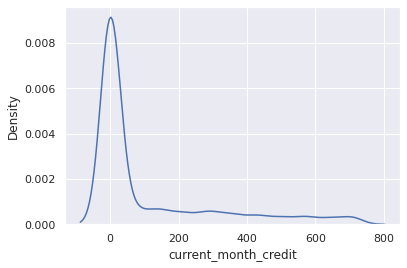

In [ ]:
sns.kdeplot(x = 'current_month_credit', data=df_baru5)

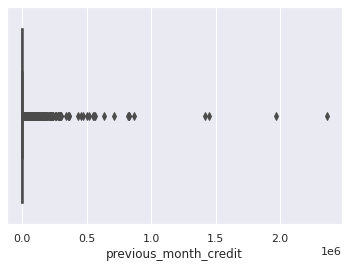

In [ ]:
sns.boxplot(x = 'previous_month_credit', data=df)

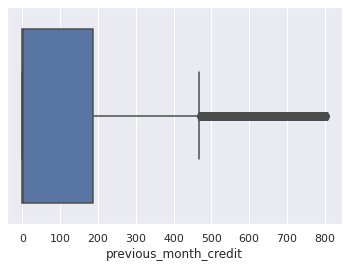

In [ ]:
df_baru6 = df.copy()
df_baru6 = IQR(df_baru6, 'previous_month_credit')

sns.boxplot(x = 'previous_month_credit', data=df_baru6)

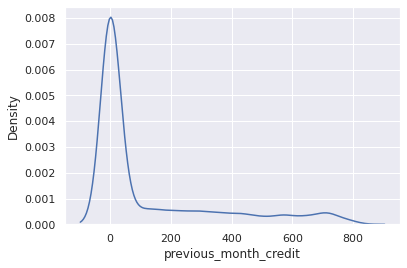

In [ ]:
sns.kdeplot(x = 'previous_month_credit', data=df_baru6)

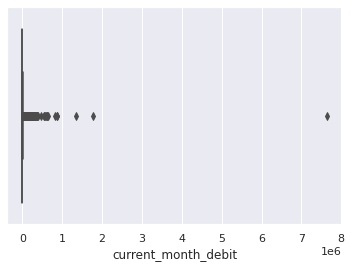

In [ ]:
sns.boxplot(x = 'current_month_debit', data=df)

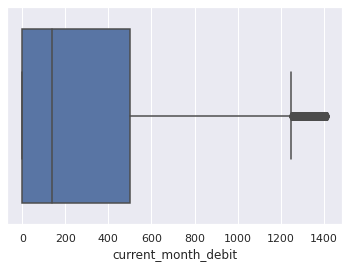

In [ ]:
df_baru7 = df.copy()
df_baru7 = IQR(df_baru7, 'current_month_debit')

sns.boxplot(x = 'current_month_debit', data=df_baru7)

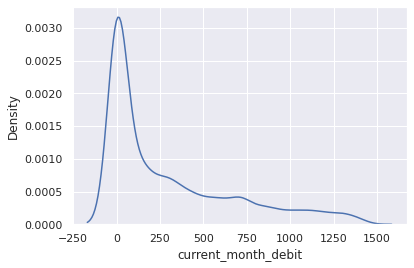

In [ ]:
sns.kdeplot(x = 'current_month_debit', data=df_baru7)

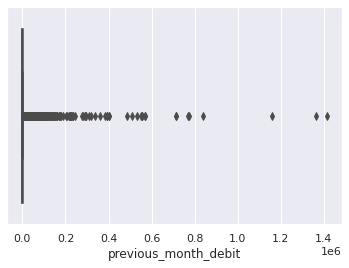

In [ ]:
sns.boxplot(x = 'previous_month_debit', data=df)

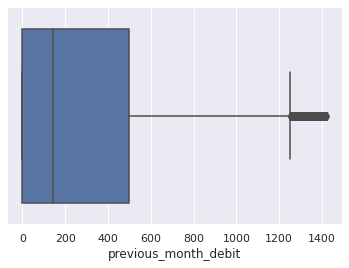

In [ ]:
df_baru8 = df.copy()
df_baru8 = IQR(df_baru8, 'previous_month_debit')

sns.boxplot(x = 'previous_month_debit', data=df_baru8)

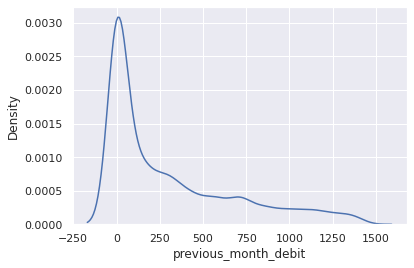

In [ ]:
sns.kdeplot(x = 'previous_month_debit', data=df_baru8)

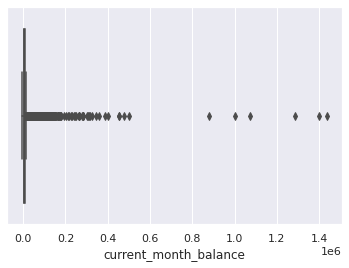

In [ ]:
sns.boxplot(x = 'current_month_balance', data=df)

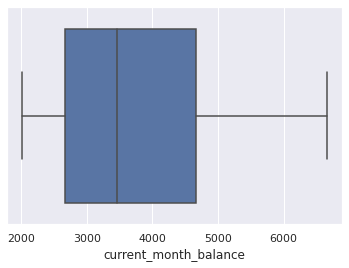

In [ ]:
df_baru9 = df.copy()
df_baru9 = IQR(df_baru9, 'current_month_balance')

sns.boxplot(x = 'current_month_balance', data=df_baru9)

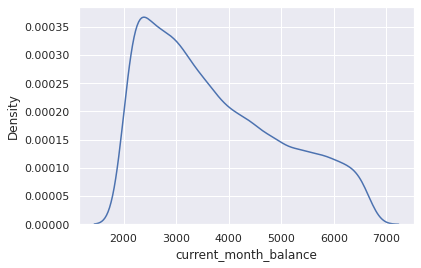

In [ ]:
sns.kdeplot(x = 'current_month_balance', data=df_baru9)

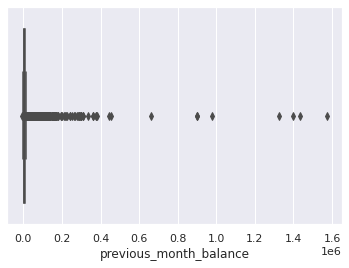

In [ ]:
sns.boxplot(x = 'previous_month_balance', data=df)

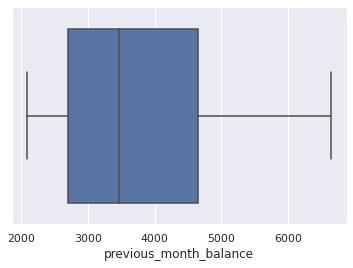

In [ ]:
df_baru10 = df.copy()
df_baru10 = IQR(df_baru10, 'previous_month_balance')

sns.boxplot(x = 'previous_month_balance', data=df_baru10)

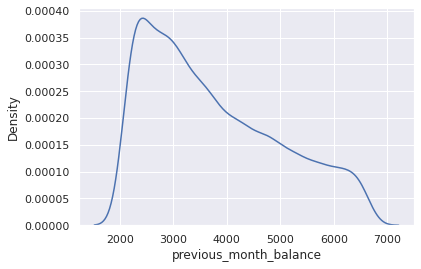

In [ ]:
sns.kdeplot(x = 'previous_month_balance', data=df_baru10)

## ***Bivariate Analysis***

In [ ]:
df['churn'] = df['churn'].astype(np.int)
corrs = df.corr()[['churn']]
print(corrs)

                                   churn
vintage                        -0.006989
age                            -0.026266
dependents                      0.033487
city                           -0.003515
customer_nw_category            0.006649
branch_code                     0.033090
current_balance                -0.037562
previous_month_end_balance      0.015763
average_monthly_balance_prevQ   0.025244
average_monthly_balance_prevQ2  0.030476
current_month_credit            0.022565
previous_month_credit           0.042636
current_month_debit             0.050234
previous_month_debit            0.075760
current_month_balance          -0.006422
previous_month_balance          0.030140
churn                           1.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

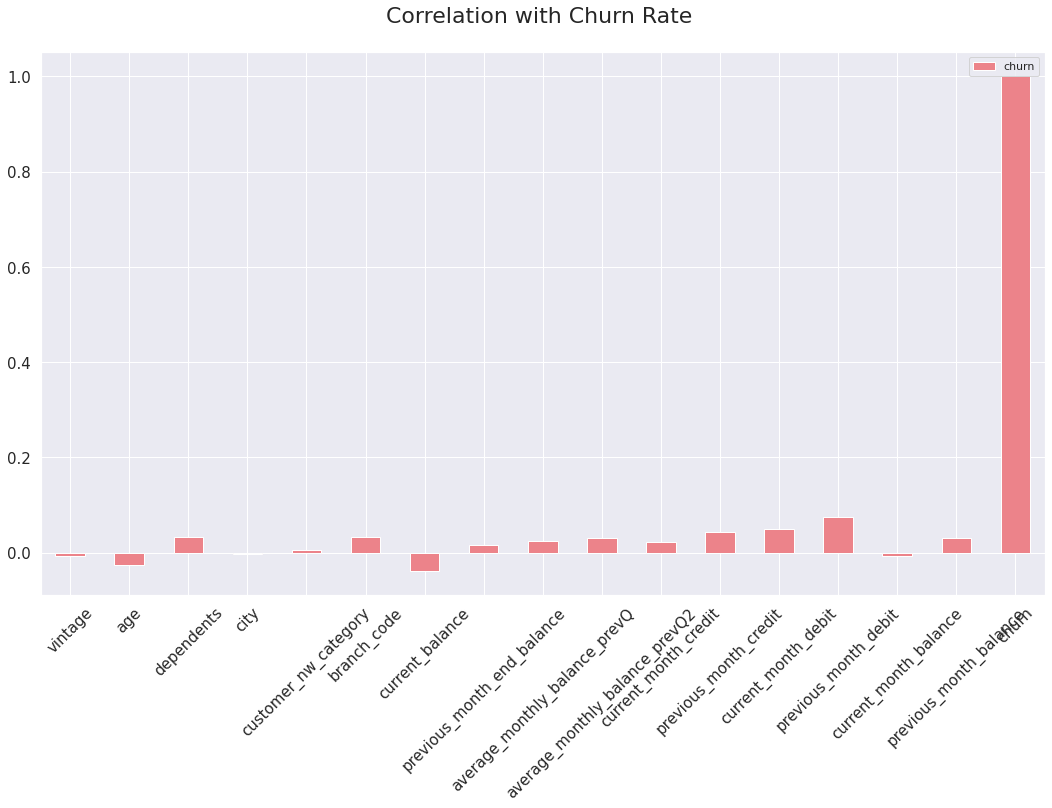

In [ ]:
corrs.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [ ]:
reduction = df['current_month_balance'] - df['previous_month_balance']
print(reduction)

pos_count, neg_count = 0, 0
  
# iterating each number in list 
for num in reduction: 
      
    # checking condition 
    if num >= 0: 
        pos_count += 1
  
    else: 
        neg_count += 1
          
print("Positive numbers in the list: ", pos_count) 
print("Negative numbers in the list: ", neg_count)

df['reduction'] = reduction

0           0.00
1       -2290.83
2         -63.86
4        -520.01
5         369.69
          ...   
28377       0.00
28378      48.22
28379    3514.26
28380       0.00
28381    -857.96
Length: 25919, dtype: float64
Positive numbers in the list:  14014
Negative numbers in the list:  11905


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


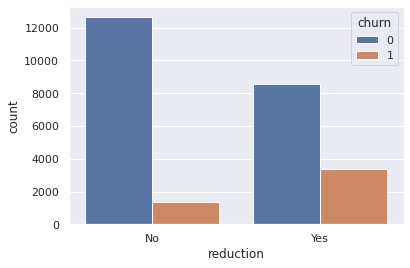

In [ ]:
df ['reduction'] = df['reduction'].apply(lambda x:  '1' if x < 0 else '0'); 
ax = sns.countplot ( x='reduction', data = df, hue='churn') 
ax = ax.set_xticklabels(["No","Yes"])

In [ ]:
df['reduction'] = df['reduction'].astype(np.int)
corrs = df.corr()[['churn']]
print(corrs)

                                   churn
vintage                        -0.006989
age                            -0.026266
dependents                      0.033487
city                           -0.003515
customer_nw_category            0.006649
branch_code                     0.033090
current_balance                -0.037562
previous_month_end_balance      0.015763
average_monthly_balance_prevQ   0.025244
average_monthly_balance_prevQ2  0.030476
current_month_credit            0.022565
previous_month_credit           0.042636
current_month_debit             0.050234
previous_month_debit            0.075760
current_month_balance          -0.006422
previous_month_balance          0.030140
churn                           1.000000
reduction                       0.236875


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


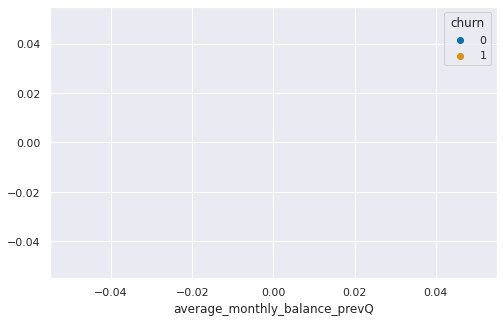

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='average_monthly_balance_prevQ', hue="churn",
              data=df, palette='colorblind', 
                    legend='full', alpha= 0.4)

Hubungan kecenderungan churn dengan jenis kelamin pelanggan

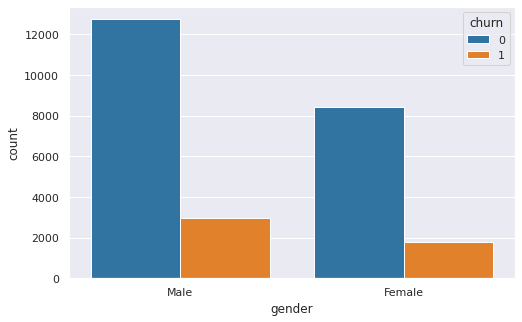

In [ ]:
for col in ['gender']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='churn', data=df, palette="tab10")
    plt.show()

In [ ]:
table = pd.crosstab(df['gender'],df['churn'])
print(table)

churn       0     1
gender             
Female   8451  1768
Male    12735  2965


Hubungan  kecenderungan churn dengan usia pelanggan

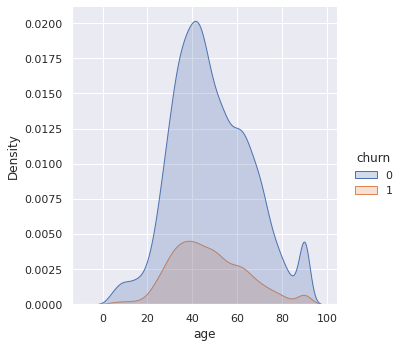

In [ ]:
sns.displot(df, x="age", hue="churn", kind="kde", fill=True)

In [ ]:
table = pd.crosstab((df['age'] < 40),df['churn'])
print(table)

churn      0     1
age               
False  14134  3038
True    7052  1695


Hubungan kecenderungan churn dengan tingkat penghasilan pelanggan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


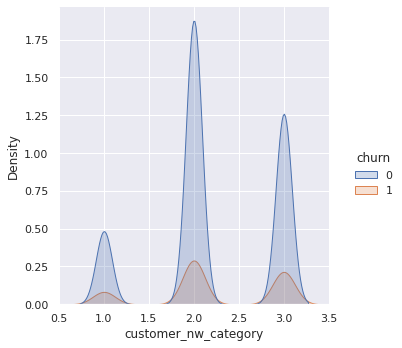

In [ ]:
df['customer_nw_category'] = df['customer_nw_category'].astype(np.int)
sns.displot(df, x="customer_nw_category", hue="churn", kind="kde", fill=True)

In [ ]:
table = pd.crosstab((df['customer_nw_category'] == 3),df['churn'])
print(table)

churn                     0     1
customer_nw_category             
False                 13816  3002
True                   7370  1731


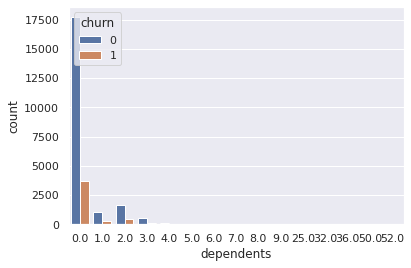

In [ ]:
#hubungan churn dengan tanggungan keluarga yang dimiliki nasabah

sns.countplot (x='dependents', data=df, hue="churn")

In [ ]:
table = pd.crosstab((df['dependents'] == 0.0),df['churn'])
print(table)

churn           0     1
dependents             
False        3486   998
True        17700  3735


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


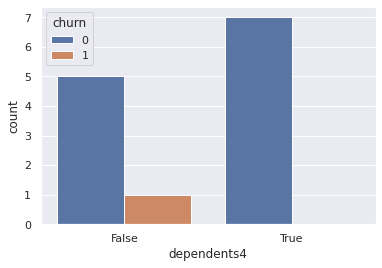

In [ ]:
#hubungan churn dengan nasabah yang memiliki tanggungan keluarga < 4

df['dependents4'] = df.dependents.value_counts() < 4.0
sns.countplot (x='dependents4', data=df, hue="churn")

In [ ]:
table = pd.crosstab((df['dependents'] < 4.0),df['churn'])
print(table)

churn           0     1
dependents             
False         194    44
True        20992  4689


In [ ]:
#df['last_transaction'] = pd.to_datetime(df['last_transaction'])
#table = pd.crosstab((df['last_transaction'] < '2019-05'),df['churn'])
#print(table)

In [ ]:
#Hubungan churn dengan transaksi terakhir nasabah lebih dari 6 bulan lalu
#df['last_transaction'] = df['last_transaction'].values.astype(int)
#sns.kdeplot(x='last_transaction', data=df, hue='churn')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


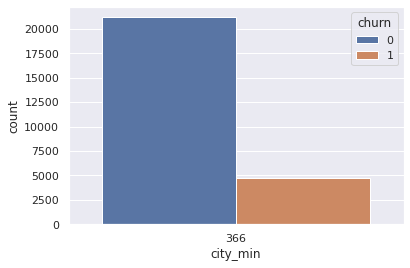

In [ ]:
#Hubungan churn dengan kota dan cabang bank dengan jumlah nasabah yang kecil
df['city_min'] = df['city'].value_counts().idxmin()
sns.countplot(x='city_min', data=df, hue="churn")

In [ ]:
table = pd.crosstab((df['city'] <= 323),df['churn'])
print(table)

churn      0     1
city              
False  17944  3997
True    3242   736


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


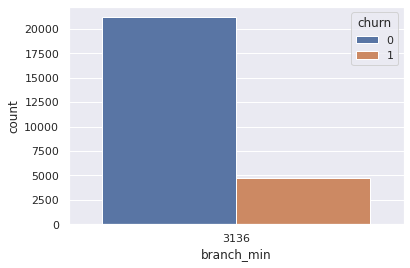

In [ ]:
df['branch_code'] = df['branch_code'].astype(np.int)
df['branch_min'] = df['branch_code'].value_counts().idxmin()
sns.countplot (x='branch_min', data=df, hue="churn")

In [ ]:
table = pd.crosstab((df['branch_code'] <= 1823),df['churn'])
print(table)

churn            0     1
branch_code             
False         3121   801
True         18065  3932


# ***Data Preprocessing 2 : Drop Columns***

In [ ]:
# Pengecekan jika ada value yang kosong pada setiap kolom
df.isna().sum()

customer_id                           0
vintage                               0
age                                   0
gender                                0
dependents                            0
occupation                            0
city                                  0
customer_nw_category                  0
branch_code                           0
current_balance                       0
previous_month_end_balance            0
average_monthly_balance_prevQ         0
average_monthly_balance_prevQ2        0
current_month_credit                  0
previous_month_credit                 0
current_month_debit                   0
previous_month_debit                  0
current_month_balance                 0
previous_month_balance                0
churn                                 0
last_transaction                      0
reduction                             0
dependents4                       25906
city_min                              0
branch_min                            0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25919 entries, 0 to 28381
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     25919 non-null  object 
 1   vintage                         25919 non-null  int64  
 2   age                             25919 non-null  int64  
 3   gender                          25919 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      25919 non-null  object 
 6   city                            25919 non-null  int64  
 7   customer_nw_category            25919 non-null  int64  
 8   branch_code                     25919 non-null  int64  
 9   current_balance                 25919 non-null  float64
 10  previous_month_end_balance      25919 non-null  float64
 11  average_monthly_balance_prevQ   25919 non-null  float64
 12  average_monthly_balance_prevQ2  

In [ ]:
# Membuat kolom baru dari value kolom-kolom kategorikal menjadi numerik/boolean supaya dapat diproses.
df = df.join(pd.get_dummies(df['gender']))
df = df.join(pd.get_dummies(df['occupation']))
df = df.join(pd.get_dummies(df['customer_nw_category']))
df = df.drop(columns = ['gender', 'occupation', 'customer_nw_category','city_min','branch_min','dependents4'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25919 entries, 0 to 28381
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     25919 non-null  object 
 1   vintage                         25919 non-null  int64  
 2   age                             25919 non-null  int64  
 3   dependents                      25919 non-null  float64
 4   city                            25919 non-null  int64  
 5   branch_code                     25919 non-null  int64  
 6   current_balance                 25919 non-null  float64
 7   previous_month_end_balance      25919 non-null  float64
 8   average_monthly_balance_prevQ   25919 non-null  float64
 9   average_monthly_balance_prevQ2  25919 non-null  float64
 10  current_month_credit            25919 non-null  float64
 11  previous_month_credit           25919 non-null  float64
 12  current_month_debit             

# ***Prediction Model***

## ***Parameter Setting***

Pada tahap ini, dilakukna pengaturan parameter yang akan digunakan untuk melakukan prediksi terhadap churn. Parameter yang digunakan di awal model adalah semua variabel independen yang ada pada dataframe.

In [ ]:
fitur = ["vintage", "age", "dependents", "city", "branch_code", "current_balance", "previous_month_end_balance", "average_monthly_balance_prevQ", "average_monthly_balance_prevQ2", 
         "current_month_credit", "previous_month_credit","current_month_debit","previous_month_debit","current_month_balance","previous_month_balance", "Female","Male", "company",
        "retired", "salaried", "self_employed","student"]
x = df[fitur]
y = df["churn"]

In [ ]:
# Import Library Sklearn
from sklearn import model_selection # Mengimpor prediction library
from sklearn.model_selection import KFold # Cross Validation
from sklearn.model_selection import cross_val_score # Mengambil nilai hasil testing
from sklearn.model_selection import cross_validate # Mengambil hasil testing
from sklearn.model_selection import train_test_split # Repeated hold out
from sklearn.metrics import classification_report # Menampilkan hasil testing
from sklearn.tree import DecisionTreeClassifier #Classifier untuk decision tree
from sklearn.metrics import f1_score #menghitung f1 score

## **Decision Tree**

Klasifikasi menggunakan library DecisionTreeClassifier memiliki beberapa parameter yang bisa diubah untuk menentukan metode mana yang memberikan nilai paling baik. Diantaranya :

*   criterion : "gini" atau "entropy"; default = "gini"
*   splitter : "best" atau "random"; default = "best"

---
Sumber : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html



In [ ]:
dtree = DecisionTreeClassifier()
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
print(cross_val_score(dtree, x, y, cv=kfold, scoring="accuracy"))

[0.79398148 0.79783951 0.79050926 0.78780864 0.79243827 0.78279321
 0.78780864 0.77893519 0.7966821  0.78927055]


KFold merupakan library yang digunakan untuk menguji klasifikasi menggunakan metode Cross Validation. Parameter yang digunakan sebagai berikut :

* n_split : total fold yang digunakan; menggunakan 10
* shuffle : parameter apakah setiap fold diacak atau tidak; default = False
* random_state : digunakan apabila shuffle = True, sebagai penanda *randomness* dari setiap fold, jika tidak diisi bisa mengakibatkan nilai akurasi berubah setiap kali running

---
Sumber : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html


In [ ]:
print(cross_val_score(dtree, x, y, cv=kfold, scoring="recall"))
print(cross_val_score(dtree, x, y, cv=kfold, scoring="recall").mean())

[0.45633188 0.42827869 0.46794872 0.46137787 0.45755694 0.42217484
 0.46626984 0.43721973 0.46396396 0.40283401]
0.44121516093802693


In [ ]:
dt_gini_best = DecisionTreeClassifier(criterion="gini")
dt_gini_random = DecisionTreeClassifier(splitter="random")
dt_ent_best = DecisionTreeClassifier(criterion='entropy')
dt_ent_random = DecisionTreeClassifier(criterion='entropy', splitter='random')

fold5 = model_selection.KFold(random_state=42, shuffle=True)
fold10 = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

score_gini_best5 = cross_val_score(dt_gini_best, x, y, cv=fold5, scoring="accuracy")
score_gini_best10 = cross_val_score(dt_gini_best, x, y, cv=fold10, scoring="accuracy")
score_gini_random5 = cross_val_score(dt_gini_random, x, y, cv=fold5, scoring="accuracy")
score_gini_random10 = cross_val_score(dt_gini_random, x, y, cv=fold10, scoring="accuracy")
score_ent_best5 = cross_val_score(dt_ent_best, x, y, cv=fold5, scoring="accuracy")
score_ent_best10 = cross_val_score(dt_ent_best, x, y, cv=fold10, scoring="accuracy")
score_ent_random5 = cross_val_score(dt_ent_random, x, y, cv=fold5, scoring="accuracy")
score_ent_random10 = cross_val_score(dt_ent_random, x, y, cv=fold10, scoring="accuracy")

print("Accuracy Decision Tree (Gini, Best, 5 Fold CV): %.3f%%" % (score_gini_best5.mean()*100))
print("Accuracy Decision Tree (Gini, Best, 10 Fold CV): %.3f%%" % (score_gini_best10.mean()*100))
print("Accuracy Decision Tree (Gini, Random, 5 Fold CV): %.3f%%" % (score_gini_random5.mean()*100))
print("Accuracy Decision Tree (Gini, Random, 10 Fold CV): %.3f%%" % (score_gini_random10.mean()*100))
print("Accuracy Decision Tree (Entropy, Best, 5 Fold CV): %.3f%%" % (score_ent_best5.mean()*100))
print("Accuracy Decision Tree (Entropy, Best, 10 Fold CV): %.3f%%" % (score_ent_best10.mean()*100))
print("Accuracy Decision Tree (Entropy, Random, 5 Fold CV): %.3f%%" % (score_ent_random5.mean()*100))
print("Accuracy Decision Tree (Entropy, Random, 10 Fold CV): %.3f%%" % (score_ent_random10.mean()*100))

Accuracy Decision Tree (Gini, Best, 5 Fold CV): 79.108%
Accuracy Decision Tree (Gini, Best, 10 Fold CV): 78.703%
Accuracy Decision Tree (Gini, Random, 5 Fold CV): 77.202%
Accuracy Decision Tree (Gini, Random, 10 Fold CV): 77.040%
Accuracy Decision Tree (Entropy, Best, 5 Fold CV): 79.610%
Accuracy Decision Tree (Entropy, Best, 10 Fold CV): 79.451%
Accuracy Decision Tree (Entropy, Random, 5 Fold CV): 77.769%
Accuracy Decision Tree (Entropy, Random, 10 Fold CV): 77.669%


Kemudian dilakukan pembandingan akurasi dengan merubah beberapa parameter

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=26)

train_test_split digunakan untuk menguji klasifikasi dengan menggunakan repeated hold out. Parameternya sebagai berikut :
* arrays : data yang akan digunakan
* test_size : jumlah data tes 0.2
* train_size : jumlah data train 0.8
---
Sumber : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Dalam melakukan training, data harus disesuaikan pada model dengan menggunakan .fit

In [ ]:
score_test = dtree.score(x_test, y_test)
print(score_test)

0.7876157407407407


untuk mengetahui hasil akurasi, maka menggunakan metode .score dengan parameter data tes

In [ ]:
predict = dtree.predict(x_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4229
           1       0.43      0.45      0.44       955

    accuracy                           0.79      5184
   macro avg       0.65      0.66      0.65      5184
weighted avg       0.79      0.79      0.79      5184



untuk mengetahui confusion matrix, bisa menggunakan library classification report dengan sebelumnya melakukan proses prediksi menggunakan metode .predict

In [ ]:
train_size = [0.8, 0.75, 0.7, 0.6]
dtree = [dt_gini_best, dt_gini_random, dt_ent_best, dt_ent_random]
for dt in dtree :
  for f in train_size :
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=f, random_state=42)
    dt.fit(x_train, y_train)
    score_test = dt.score(x_test, y_test)
    predict = dt.predict(x_test)
    if dt == dt_gini_best: print("Accuracy Decision Tree (Gini, Best) with Train size %.2f : %.3f%%" % (f, score_test*100))
    if dt == dt_gini_random: print("Accuracy Decision Tree (Gini, Random) with Train size %.2f : %.3f%%" % (f, score_test*100))
    if dt == dt_ent_best: print("Accuracy Decision Tree (Entropy, Best) with Train size %.2f : %.3f%%" % (f, score_test*100))
    if dt == dt_ent_random: print("Accuracy Decision Tree (Entropy, Random) with Train size %.2f : %.3f%%" % (f, score_test*100))

Accuracy Decision Tree (Gini, Best) with Train size 0.80 : 79.379%
Accuracy Decision Tree (Gini, Best) with Train size 0.75 : 78.565%
Accuracy Decision Tree (Gini, Best) with Train size 0.70 : 78.974%
Accuracy Decision Tree (Gini, Best) with Train size 0.60 : 78.212%
Accuracy Decision Tree (Gini, Random) with Train size 0.80 : 77.720%
Accuracy Decision Tree (Gini, Random) with Train size 0.75 : 77.546%
Accuracy Decision Tree (Gini, Random) with Train size 0.70 : 77.418%
Accuracy Decision Tree (Gini, Random) with Train size 0.60 : 76.842%
Accuracy Decision Tree (Entropy, Best) with Train size 0.80 : 79.977%
Accuracy Decision Tree (Entropy, Best) with Train size 0.75 : 79.707%
Accuracy Decision Tree (Entropy, Best) with Train size 0.70 : 79.077%
Accuracy Decision Tree (Entropy, Best) with Train size 0.60 : 78.723%
Accuracy Decision Tree (Entropy, Random) with Train size 0.80 : 78.414%
Accuracy Decision Tree (Entropy, Random) with Train size 0.75 : 78.812%
Accuracy Decision Tree (Entropy,

Membandingkan Decision Tree dengan berbagai train size

Membuat visualisasi ROC plot untuk membandingkan beberapa metode klasifikasi. Diakhir, didapatkan bahwa dengan menggunakan model Decision Tree didapatkan hasil f1-score accuracy 0,79 dan juga ROC score 0,66

## **k-NN**
K-nearest neighbors atau knn merupakan algoritma yang berfungsi untuk melakukan klasifikasi suatu data berdasarkan data pembelajaran (*train data sets*) yang diambil dari k tetangga terdekatnya (*nearest neighbors*). K merupakan banyaknya tetangga terdekat. Disini nilai k adalah 8 dengan nilai split 10

Klasifikasi menggunakan library DecisionTreeClassifier memiliki beberapa parameter yang bisa diubah untuk menentukan metode mana yang memberikan nilai paling baik. Diantaranya :
* n_neighbors : default = 5

---


Sumber : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
# Proses Klasifikasi KNN menggunakan Cross Validation
from sklearn.neighbors import KNeighborsClassifier # Library untuk metode KNN
knn = KNeighborsClassifier(n_neighbors=8)
kfold = model_selection.KFold(n_splits=10)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
result = cross_val_score(knn, x, y, cv=kfold, scoring="accuracy") 
print(result.mean())

0.8475638606572609


In [ ]:
# Proses klasifikasi KNN menggunakan train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=42)
knn.fit(x_train, y_train)
score_test = knn.score(x_test, y_test)
predict = knn.predict(x_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      5298
           1       0.70      0.31      0.43      1182

    accuracy                           0.85      6480
   macro avg       0.78      0.64      0.67      6480
weighted avg       0.83      0.85      0.83      6480



Proses klasifikasi ini menggunakan train test split dengan ukuran data yang digunakan untuk pengujian adalah 0,75 atau 75%. Didapatkan tingkat akurasi sekitar 85%

Minimum error:- 0.145679012345679 at K = 12


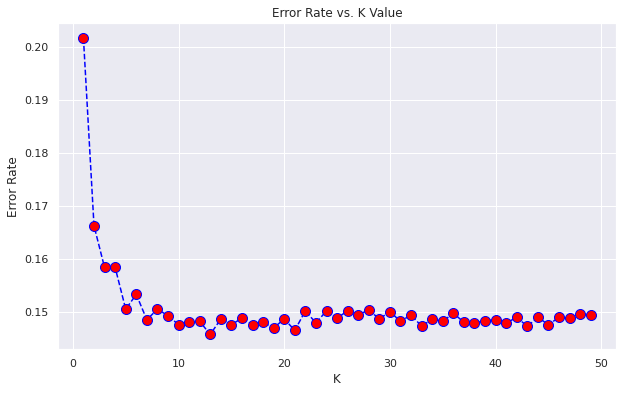

In [ ]:
error_rate = []
for i in range(1,50):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Kemudian dilakukan pencarian dengan beberapa nilai k dari 1 hingga 50, untuk dilakukan perbandingan pada nilai k berapa yang memberikan akurasi tertinggi. Ada 2 hal yang dicari, dilihat dari sisi error dan accuracy. Pada nilai k = 12, didapatkan akurasi tertinggi yaitu 85,4% dengan error 14,5%

Maximum accuracy:- 0.854320987654321 at K = 12


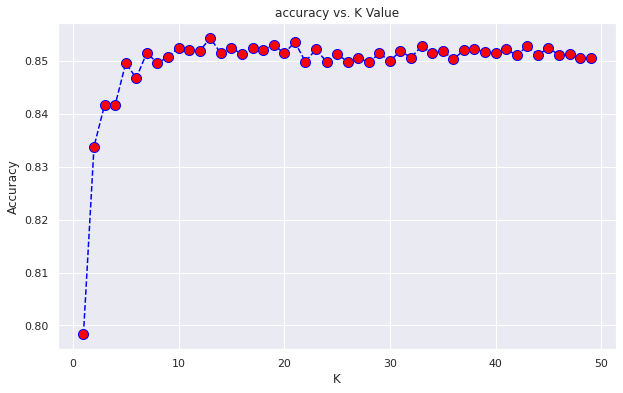

In [ ]:
acc = []
from sklearn import metrics
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
knn.fit(x_train, y_train)
pred_knn = knn.predict_proba(x_test)[:,1]
roc2 = roc_auc_score(y_test, pred_knn)
print("ROC Score : %.3f%%" % (roc2*100))

ROC Score : 82.574%


Dengan menggunakan metode k-NN didapatkan hasil akurasi pada nilai k = 12 yaitu 85,4% dan nilai ROC 82,5%

## **Naive Bayes**

Untuk menggunakan metode Naive Bayes kami menggunakan library GaussianNB pada python

In [ ]:
from sklearn.naive_bayes import GaussianNB
naivebayes = GaussianNB()
kfold = model_selection.KFold()
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
#print(cross_validate(naivebayes, x, y, cv=kfold, scoring=scoring))
print(cross_val_score(naivebayes, x, y, cv=kfold, scoring="f1"))
print(cross_val_score(naivebayes, x, y, cv=kfold, scoring="roc_auc"))
result = cross_val_score(naivebayes, x, y, cv=kfold, scoring="f1")
result2 = cross_val_score(naivebayes, x, y, cv=kfold, scoring="roc_auc")
print(result.mean()*100)
print(result2.mean()*100)

[0.07471264 0.07606679 0.07279345 0.08163265 0.07735849]
[0.62932419 0.62991181 0.62861024 0.61997575 0.61733615]
7.651280524951094
62.50316306065591


Membagi data training dan data testing. Data training yang digunakan adalah sebesar 0.6 atau 60% dari keseluruhan data dengan tingkat random sebesar 42.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=42)
naivebayes.fit(x_train, y_train)
score_test = naivebayes.score(x_test, y_test)
predict = naivebayes.predict(x_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      8475
           1       0.35      0.04      0.08      1893

    accuracy                           0.81     10368
   macro avg       0.58      0.51      0.49     10368
weighted avg       0.73      0.81      0.75     10368



Membandingkan klasifikasi Naive Bayes dengan nilai train size 0.9, 0.8, 0.75, 0.7, 2/3

In [ ]:
train_size = [0.9, 0.8, 0.75, 0.7, 2/3]
fold = [10]
for f in train_size :
    naivebayes = GaussianNB()
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=f, random_state=42)
    naivebayes.fit(x_train, y_train)
    score = naivebayes.score(x_test, y_test)
    print("AUC-ROC Score for Naive Bayes train size %.2f : %.3f%%" % (f, result.mean()*100), result.std()*100)
    print("F1 Score for Naive Bayes train size %.2f : %.3f%%" % (f, result2.mean()*100), result2.std()*100)

Dari hasil perbandingan klasifikasi Naive Bayes diatas didapatkan skor auc-roc adalah 7.6% dan skor untuk F1 adalah 62.5%

## **SVM**

Untuk metode SVM (Support Vector Machine) kami menggunakan klasifikasi SVC dengan parameter :
kernel:'linear', 'poly', 'rbf', 'sigmoid'

In [ ]:
# Klasifikasi SVM menggunakan Cross Validation
from sklearn.svm import SVC #Import Library SVM
svm = SVC()
kfold = model_selection.KFold()
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
print(cross_validate(svm, x, y, cv=kfold, scoring='f1'))
print(cross_validate(svm, x, y, cv=kfold, scoring='roc_auc'))
result = cross_val_score(svm, x, y, cv=kfold, scoring="f1")
result2 = cross_val_score(svm, x, y, cv=kfold, scoring="roc_auc")
print(result.mean()*100)
print(result2.mean()*100)

{'fit_time': array([12.31434298, 12.37801027, 12.33141494, 12.17380238, 12.17791915]), 'score_time': array([2.01053977, 2.01242924, 1.99511981, 1.99293709, 2.02995253]), 'test_score': array([0.12151394, 0.12761905, 0.11498586, 0.11195446, 0.21292776])}
{'fit_time': array([12.21235371, 12.34479594, 12.30207205, 12.15171456, 12.21581101]), 'score_time': array([2.02374506, 1.99105263, 2.00378156, 2.00224805, 2.00586796]), 'test_score': array([0.80195138, 0.7968627 , 0.79906476, 0.80159731, 0.79360043])}
13.780021401863033
79.8615317946838


Membagi data training dan data testing. Data training yang digunakan adalah sebesar 0.9 atau 90% dari keseluruhan data dengan tingkat random sebesar 42.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=42)
svm.fit(x_train, y_train)
score_test = svm.score(x_test, y_test)
predict = svm.predict(x_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91      2134
           1       0.69      0.08      0.14       458

    accuracy                           0.83      2592
   macro avg       0.76      0.54      0.52      2592
weighted avg       0.81      0.83      0.77      2592



In [ ]:
# Membandingkan klasifikasi SVM dengan mengubah kernel
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
train_size = [0.8, 3/4, 0.7, 0.6]
for k in kernel:
  for f in train_size:
    model = SVC(kernel=k)
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=f, random_state=42)
    model.fit(x_train, y_train)
    score_test = model.score(x_test, y_test)
    print("Accuracy SVM (Kernel =", k,") train size %.2f : %.3f%%" % (f, score_test*100))
    print("AUC-ROC Score for SVM (Kernel =", k,") train size %.2f : %.3f%%" % (f, result.mean()*100), result.std()*100)
    print("F1 Score for SVM (Kernel =", k,") train size %.2f : %.3f%%" % (f, result2.mean()*100), result2.std()*100)

## **BPNN**

Mengimpor *library* dan menginisiasi model yang dibutuhkan

In [ ]:
from sklearn.neural_network import MLPClassifier # Library yang digunakan adalah MLPClassifier dari sklearn.neural_network
kfold = model_selection.KFold() # mendefinisikan kfold yang akan digunakan

Pembangunan model *neural network*

In [ ]:
# parameter iterasi yang digunakan maksimal 500. Sebelumnya telah dilakukan menggunakan max_iter = 1000, namun menghasilkan hasil yang sama dengan max_iter = 500.
# ukuran hidden layer yang digunakan adalah 5,50.
mlp = MLPClassifier(max_iter=500, hidden_layer_sizes=(5,50))
# print(cross_val_score(mlp, x, y, cv=kfold, scoring='accuracy'))
# menghasilkan rata-rata dan standar deviasi dari nilai akurasi yang dihasilkan
result = cross_val_score(mlp, x, y, cv=kfold, scoring='accuracy')
print(result.mean()*100)
print(result.std()*100)

Pembagian *data training* dan *data testing*

In [ ]:
# Membagi data training dan data testing. Data training yang digunakan adalah sebesar 0.8 atau 80% dari keseluruhan data dengan tingkat random sebesar 42.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
# Melakukan klasifikasi mlp menggunakan model yang telah dibangun dan data training yang telah didapatkan sebelumnya
mlp.fit(x_train, y_train)
# Menghasilkan nilai testing dari model yang telah dibangun dengan menggunakan data testing
score_test = mlp.score(x_test, y_test)
predict = mlp.predict(x_test)
print(classification_report(y_test, predict))

Evaluasi hasil dengan membandingkan klasifikasi *Neural Network* dari tipe-tipe aktivasinya

In [ ]:
aktivasi = ['relu', 'identity', 'logistic', 'tanh']
fold = [10]
for a in aktivasi :
  for f in fold :
    mlp = MLPClassifier(hidden_layer_sizes=(5,50), activation=a, max_iter = 500)
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
    result = cross_val_score(mlp, x, y, cv=kfold, scoring= 'roc_auc') 
    result_2 = cross_val_score(mlp, x, y, cv=kfold, scoring= 'f1') 
    print("AUC-ROC Score for Neural Network (Activation =", a,") %.f-fold : %.3f%%" % (f, result.mean()*100), result.std()*100)
    print("F1 Score for Neural Network (Activation =", a,") %.f-fold : %.3f%%" % (f, result_2.mean()*100), result_2.std()*100)

Dari hasil evaluasi tersebut, dapat disimpulkan bahwa klasifikasi BPNN terbaik didapatkan oleh tipe aktivasi **LOGISTIC**. Dengan nilai AUC-ROC yang didapatkan sebesar 78% dan nilai F1 sebesar 46%.
Dengan catatan:
Nilai AUC-ROC semakin menjauhi 50% akan semakin baik.
Nilai F1 semakin mendekati 1 akan semakin baik

# ***Backward Elimination***

Dilakukan dari semua variabel independen, kemudian memilih yang nilai korelasinya paling rendah, kemudian menghapus vaiabel tersebut, dan membandingkan hasilnya dengan hasil tanpa menghapus variabel tersebut. Oleh karena metode terbaik dari hasil sebelumnya adalah k-NN dengan hasil akurasi 85% maka, dilakukan backward elimination untuk meningkatkan kinerja model k-NN.

In [ ]:
df['churn'] = df['churn'].astype(np.int)
corrs = df.corr()[['churn']]
print(corrs)

                                   churn
vintage                        -0.006989
age                            -0.026266
dependents                      0.033487
city                           -0.003515
branch_code                     0.033090
current_balance                -0.037562
previous_month_end_balance      0.015763
average_monthly_balance_prevQ   0.025244
average_monthly_balance_prevQ2  0.030476
current_month_credit            0.022565
previous_month_credit           0.042636
current_month_debit             0.050234
previous_month_debit            0.075760
current_month_balance          -0.006422
previous_month_balance          0.030140
churn                           1.000000
reduction                       0.236875
Female                         -0.020039
Male                            0.020039
company                        -0.009222
retired                        -0.024761
salaried                       -0.018630
self_employed                   0.039422
student         

Mencari nilai korelasi paling rendah dari semua variabel pada dataset 

In [ ]:
x = df[fitur]
y = df[['churn']]

In [ ]:
x.drop(['vintage', 'age', 'city', 'branch_code', 'current_balance', 
        'current_month_balance', 'Female', 'Male', 'company', 'retired', 'salaried', 
        'self_employed', 'student'], inplace=True, axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Melakukan drop variabel yang memiliki nilai korelasi rendah, dan melakukan test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=42)
knn.fit(x_train, y_train)
score_test = knn.score(x_test, y_test)
predict = knn.predict(x_test)
print(classification_report(y_test, predict))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


              precision    recall  f1-score   support

           0       0.84      0.97      0.90      5298
           1       0.57      0.20      0.30      1182

    accuracy                           0.83      6480
   macro avg       0.71      0.58      0.60      6480
weighted avg       0.79      0.83      0.79      6480



Setelah dilakukan backward elimination, didapatkan tingkat akurasi sebesar 83%, hal ini dapat dilihat bahwa nilai akurasi semakin rendah. Menghapus dari variabel-variabel tersebut tidak memberikan dampak positif bagi model k-NN.

## Kesimpulan *Prediction Model*

Berdasarkan 5 metode yang digunakan yaitu decision tree, k-NN, Naïve Bayes, SVM, dan BPNN didapatkan bahwa metode k-NN mendapatkan nilai tertinggi dengan akurasi hingga 85%. Selain itu, melakukan backward elimination, tidak memberikan dampak positif atau justru menurunkan nilai akurasi dari metode k-NN

# ***Linear Regression***

Mengimpor *library* yang akan digunakan

In [ ]:
# Mengimpor library Linear Regression
from sklearn.linear_model import LinearRegression

Pembangunan model regresi linear

In [ ]:
# Membangun model regresi linear, dengan variabel dependen tingkat churn dan variabel independen fitur
model = LinearRegression()
x = df[fitur]
y = df[['churn']]

# Memisahkan data testing dan training yang akan digunakan. Train size yang akan digunakan adalah sebesar 0.8 dengan tingkat random sebesar 42
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# Melatih model dan menghitung hasil MAE dari model. Fold yang digunakan adalah 10.
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
result = cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_absolute_error')
print(result)
print('MEAN MAE =' , result.mean()*100)
print('STD MAE =' , result.std()*100)

[-0.28811628 -0.29652609 -0.29201292 -0.29093428 -0.29429266 -0.2904553
 -0.29727797 -0.28682195 -0.28625719 -0.29907427]
MEAN MAE = -29.217689047015284
STD MAE = 0.4262961702109397


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


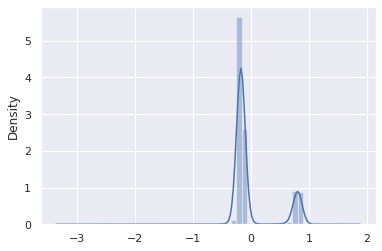

In [ ]:
# Mengeksekusi prediksi model menggunakan data test

model.fit(x_train, y_train)
predictions = model.predict(x_test)
sns.distplot(y_test-predictions)

Evaluasi hasil regresi dengan membandingkan banyak data training yang berbeda berdasarkan MAE-nya

In [ ]:
# Menampilkan MAE, MSE dan RMSE dari model yang telah dibuat
from sklearn import metrics
print('Mean Absolute Error - Test:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error - Test:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error - Test:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error - Test: 0.3075328986652027
Mean Squared Error - Test: 0.16334098258837085
Root Mean Squared Error - Test: 0.40415465182077376


In [ ]:
# Membandingkan Hasil Perbedaan Train Size Regresi
train_size = [0.6, 0.7, 0.75, 0.8]

for t in train_size :
  lm = LinearRegression()
  x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=t)
  result = cross_val_score(lm, x_test, y_test, cv=kfold, scoring='neg_mean_absolute_error')
  print("MAE for Linear Regression with Train Size =", t," = ", result.mean(),"")

MAE for Linear Regression with Train Size = 0.6  =  -0.29155700115216815 
MAE for Linear Regression with Train Size = 0.7  =  -0.29261573328164203 
MAE for Linear Regression with Train Size = 0.75  =  -0.3003758473515134 
MAE for Linear Regression with Train Size = 0.8  =  -0.28032963989910914 


Dari hasil evaluasi tersebut, dapat disimpulkan bahwa hasil regresi terbaik  didapatkan oleh regresi dengan ukuran train_size sebesar 0.8.
Nilai MAE terbaik yang didapatkan adalah sebesar 0.28.
Dengan catatan: Nilai MAE semakin kecil semakin baik.


### Backward Elimination 1

In [ ]:
# Dilakukan backward elimination pertama untuk mengeliminasi variabel-variabel yang memiliki nilai korelasi negatif terhadap churn.
# Hal ini dilakukan untuk melihat jika nilai MAE akan menurun saat variabel-variabel tersebut dihapus
x.drop(['vintage', 'age', 'city', 'branch_code', 'current_balance', 
        'current_month_balance', 'Female', 'Male', 'company', 'retired', 'salaried', 
        'self_employed', 'student'], inplace=True, axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Melakukan evaluasi MAE setelah variabel dihapus.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
result = cross_val_score(lm, x_test, y_test, cv=kfold, scoring='neg_mean_absolute_error')
print(result.mean())

-0.2988789313925559


Pada backward elimination 1, didapatkan nilai MAE berkisar antara 0.29 sampai dengan 0.30. Hal ini menunjukkan bahwa penghapusan variabel-variabel tersebut tidak berdampak positif atau dapat menurunkan nilai MAE model prediksi regresi linear ini.

### Backward Elimination 2

In [ ]:
# Dilakukan backward elimination kedua untuk mengeliminasi dua variabel yang memiliki nilai korelasi terendah terhadap churn.
# Hal ini dilakukan untuk melihat jika nilai MAE akan menurun saat variabel-variabel tersebut dihapus
x.drop(['average_monthly_balance_prevQ', 'current_month_credit'], inplace=True, axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Melakukan evaluasi MAE setelah variabel dihapus.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
result = cross_val_score(lm, x_test, y_test, cv=kfold, scoring='neg_mean_absolute_error')
print(result.mean())

-0.29670203872195755


Pada backward elimination 2, didapatkan nilai MAE berkisar antara 0.28 sampai dengan 0.30. Hal ini menunjukkan bahwa penghapusan variabel-variabel tersebut tidak berdampak positif yang signifikan atau dapat menurunkan nilai MAE model prediksi regresi linear ini.

### Kesimpulan Linear Regression

Dari backward elimination yang terlah dilakukan, dapat disimpulkan bahwa base model linear regression yang telah dibuat merupakan model terbaik dengan nilai MAE terendah.Backward elimination yang dilakukan tidak memberikan dampak positif atau justru menurunkan nilai akurasi dari metode k-NN